In [37]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

model_type="encoder"
models=["bert"]
dataset = "civil"
bias_types=["race", "gender", "religion"]
# reliance_method = "raw"
seeds = {20: list(range(1, 20))+[42], 50: list(range(1, 10))+[42], 100: [1,2,3,4,5,42], 200: [1,2,3,4,5,42], 500: [1,2,3,4,5,42]}
if dataset == "civil":
    val_nums = {"race": [20, 50, 100, 200, 500], "gender": [20, 50, 100, 200, 500], "religion": [20, 50, 100, 200]}
elif dataset == "jigsaw":
    val_nums = {"race": [20, 50, 100, 200], "gender": [20, 50, 100, 200], "religion": [20, 50, 100, 200]}
if dataset == "civil":
    test_num = {"race": 2000, "gender": 2000, "religion": 1000}
elif dataset == "jigsaw":
    test_num = {"race": 400, "gender": 800, "religion": 200}

train_types = ["single", "all"]
explanation_methods = ["Attention", "Saliency", "DeepLift", "InputXGradient", "KernelShap", "Occlusion", "IntegratedGradients"]
data_dir = f"/scratch/yifwang/fairness_x_explainability/{model_type}_results_{dataset}/model_selection_correlation"


In [39]:
model_selection_correlation_df = {"model":[], "bias_type": [], "train_type": [], "explanation_method": [], "val_num": [], "correlation_metric": [], "seed": [], "score": []}

for model in models:
    for bias_type in bias_types:
        for train_type in train_types:
            for val_num in val_nums[bias_type]:
                if dataset == "jigsaw" and val_num == 500:
                    continue
                for seed in seeds[val_num]: 
                    val_attribution_correlation_dir = os.path.join(data_dir, f"{model}_{bias_type}_{train_type}_val_{val_num}_seed_{seed}_test_{test_num[bias_type]}")
                    for method in explanation_methods:
                        val_attribution_correlation_file = os.path.join(val_attribution_correlation_dir, f"{method}_{bias_type}_val_reliance_correlation_results.json")
                        with open(val_attribution_correlation_file, "r") as f:
                            results = json.load(f)
                        aggregations = results.keys()
                        for aggregation in aggregations:
                            metrics = results[aggregation].keys()
                            for metric in metrics:
                                reliance_method = "raw"
                                model_selection_correlation_df["model"].append(model)
                                model_selection_correlation_df["bias_type"].append(bias_type)
                                model_selection_correlation_df["train_type"].append(train_type)
                                model_selection_correlation_df["explanation_method"].append(aggregation)
                                model_selection_correlation_df["val_num"].append(val_num)
                                model_selection_correlation_df["correlation_metric"].append(metric)
                                model_selection_correlation_df["seed"].append(seed)
                                model_selection_correlation_df["score"].append(results[aggregation][metric][reliance_method][0])
                                

# convert to a pandas DataFrame
import pandas as pd
model_selection_correlation_df = pd.DataFrame(model_selection_correlation_df)
model_selection_correlation_df

,model,bias_type,train_type,explanation_method,val_num,correlation_metric,seed,score
0,bert,race,single,raw_attention,20,accuracy,1,0.413315
1,bert,race,single,raw_attention,20,accuracy_rank,1,-0.035714
2,bert,race,single,raw_attention,20,f1,1,0.560980
3,bert,race,single,raw_attention,20,f1_rank,1,0.107143
4,bert,race,single,raw_attention,20,fpr,1,0.898918
...,...,...,...,...,...,...,...,...
38635,bert,religion,all,IntegratedGradients_mean,200,fpr_rank,42,-0.357143
38636,bert,religion,all,IntegratedGradients_mean,200,fnr,42,-0.176052
38637,bert,religion,all,IntegratedGradients_mean,200,fnr_rank,42,-0.107143
38638,bert,religion,all,IntegratedGradients_mean,200,individual_fairness,42,0.634276


In [44]:
fairness_correlation_df = {"model":[], "bias_type": [], "train_type": [], "val_num": [], "correlation_metric": [], "seed": [], "score": []}

for model in models:
    for bias_type in bias_types:
        for train_type in train_types:
            for val_num in val_nums[bias_type]:
                if dataset == "jigsaw" and val_num == 500:
                    continue
                for seed in seeds[val_num]: 
                    fairness_correlation_file = os.path.join(data_dir, f"{model}_{bias_type}_{train_type}_val_{val_num}_seed_{seed}_test_{test_num[bias_type]}", "fairness_correlation_results.json")
                    with open(fairness_correlation_file, "r") as f:
                        for method in explanation_methods:
                            fairness_correlation_file = os.path.join(data_dir, f"{model}_{bias_type}_{train_type}_val_{val_num}_seed_{seed}_test_{test_num[bias_type]}", "fairness_correlation_results.json")
                            with open(fairness_correlation_file, "r") as f:
                                results = json.load(f)
                            aggregations = results.keys()
                            metrics = results.keys()
                            for metric in metrics:
                                reliance_method = "raw"
                                fairness_correlation_df["model"].append(model)
                                fairness_correlation_df["bias_type"].append(bias_type)
                                fairness_correlation_df["train_type"].append(train_type)
                                fairness_correlation_df["val_num"].append(val_num)
                                fairness_correlation_df["correlation_metric"].append(metric)
                                fairness_correlation_df["seed"].append(seed)
                                fairness_correlation_df["score"].append(results[metric][0])


# convert to a pandas DataFrame
import pandas as pd
fairness_correlation_df = pd.DataFrame(fairness_correlation_df)
fairness_correlation_df



,model,bias_type,train_type,val_num,correlation_metric,seed,score
0,bert,race,single,20,accuracy,1,0.274573
1,bert,race,single,20,accuracy_rank,1,-0.214286
2,bert,race,single,20,f1,1,0.691872
3,bert,race,single,20,f1_rank,1,0.750000
4,bert,race,single,20,fpr,1,-0.712680
...,...,...,...,...,...,...,...
19315,bert,religion,all,200,fpr_rank,42,-0.071429
19316,bert,religion,all,200,fnr,42,-0.750075
19317,bert,religion,all,200,fnr_rank,42,-0.107143
19318,bert,religion,all,200,individual_fairness,42,0.885788


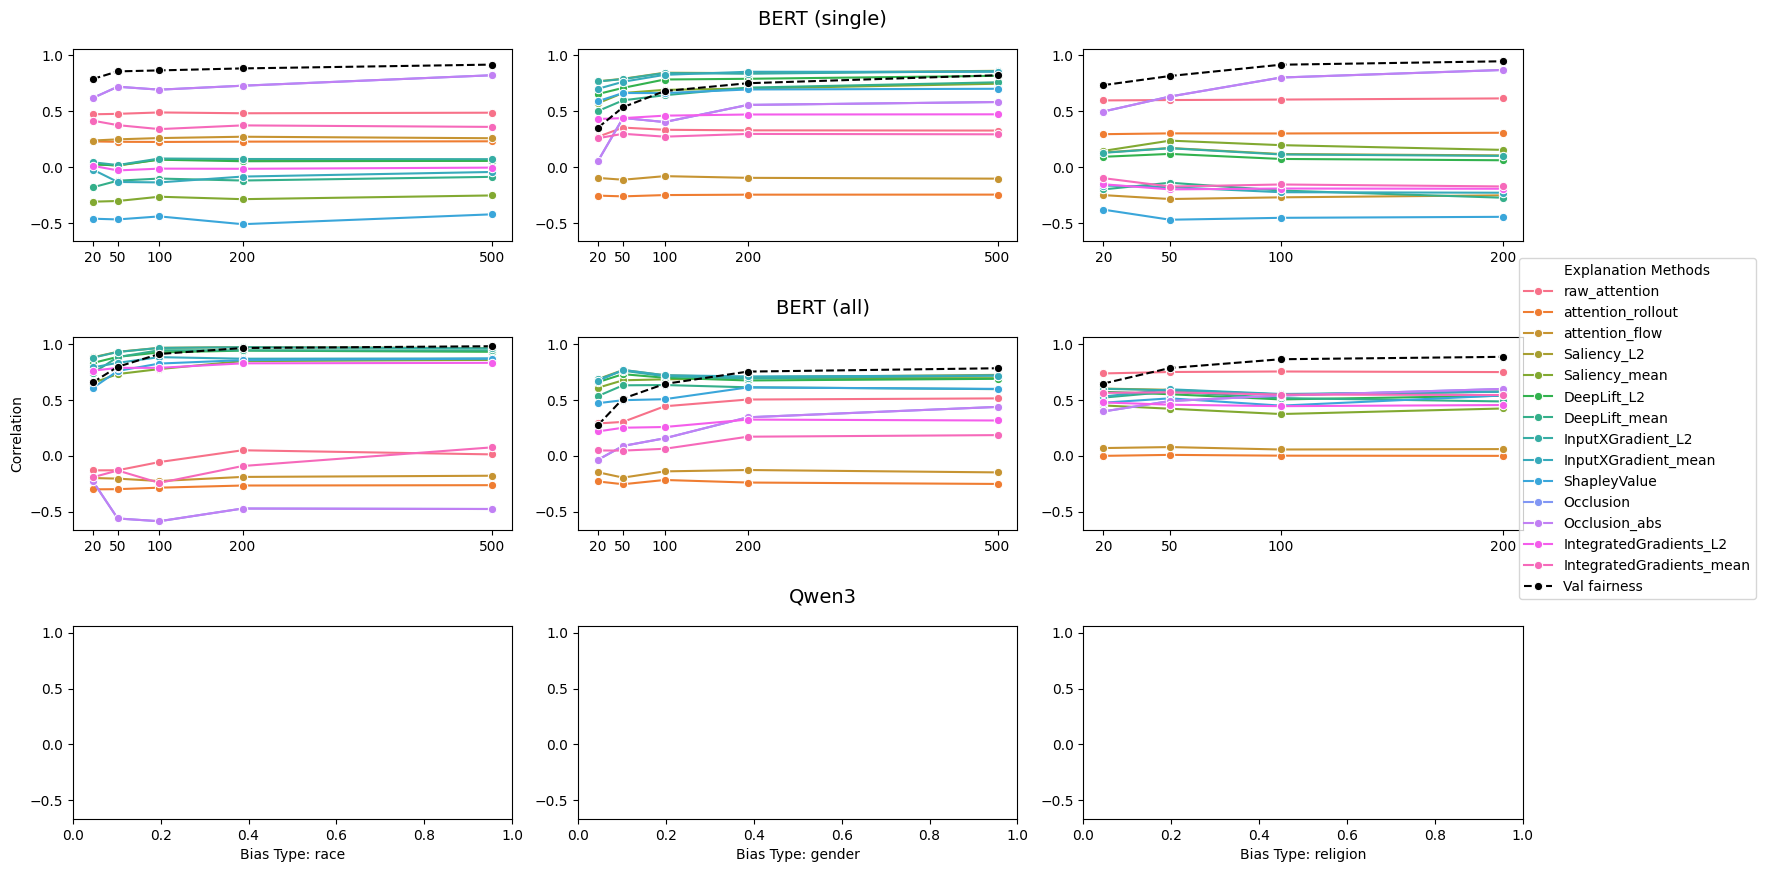

In [45]:
# visualize the above results (model: bert, correlation_metric: individual fairness)
# create 6 sub plots, each plot corresponding to one bias type (single and all are separated)
# each subplot is a line plot, x axis is the val num, y axis is the average score over all seeds for this val num
# explanation method is marked by color
# bias type is separated by subplots

import seaborn as sns
import matplotlib.pyplot as plt

plot_model = "bert"
plot_correlation_metric = "individual_fairness"
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharey=True)
plt.subplots_adjust(hspace=0.5, wspace=0.15)
for i, bias_type in enumerate(bias_types):
    ax = axes[0, i]
    plot_train_type = "single"
    plot_df = {"explanation_method":[], "x":[], "y":[]}
    fairness_df = {"x": [], "y": []}
    x_nums = val_nums[bias_type]
    for x_num in x_nums:
        y_seeds = seeds[x_num]
        for explanation_method in model_selection_correlation_df["explanation_method"].unique():
            y = model_selection_correlation_df[(model_selection_correlation_df["model"]==plot_model) & (model_selection_correlation_df["bias_type"]==bias_type) & (model_selection_correlation_df["train_type"]==plot_train_type) & (model_selection_correlation_df["val_num"]==x_num) & (model_selection_correlation_df["correlation_metric"]==plot_correlation_metric) & (model_selection_correlation_df["explanation_method"]==explanation_method) & (model_selection_correlation_df["seed"].isin(y_seeds))]["score"].mean()
            plot_df["explanation_method"].append(explanation_method)
            plot_df["x"].append(x_num)
            plot_df["y"].append(y)
        fairness_df["x"].append(x_num)
        fairness_y = fairness_correlation_df[(fairness_correlation_df["model"]==plot_model) & (fairness_correlation_df["bias_type"]==bias_type) & (fairness_correlation_df["train_type"]==plot_train_type) & (fairness_correlation_df["val_num"]==x_num) & (fairness_correlation_df["correlation_metric"]==plot_correlation_metric) & (fairness_correlation_df["seed"].isin(y_seeds))]["score"].mean()
        fairness_df["y"].append(fairness_y)
    plot_df = pd.DataFrame(plot_df)
    #plot_df["x"] = plot_df["x"].astype(str)
    sns.lineplot(data=plot_df, x="x", y="y", hue="explanation_method", ax=ax, marker="o")
    fairness_df = pd.DataFrame(fairness_df)
    #fairness_df["x"] = fairness_df["x"].astype(str)
    sns.lineplot(data=fairness_df, x="x", y="y", ax=ax, marker='o', linestyle='--', label=f"Val fairness", color='black')
    ax.set_xticks(val_nums[bias_type])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.get_legend().remove()  # Remove legend from subplot
    # ax.set_title(f"Bias Type: {bias_type}")

for i, bias_type in enumerate(bias_types):
    ax = axes[1, i]
    plot_train_type = "all"
    plot_df = {"explanation_method":[], "x":[], "y":[]}
    fairness_df = {"x": [], "y": []}
    x_nums = val_nums[bias_type]
    for x_num in x_nums:
        y_seeds = seeds[x_num]
        for explanation_method in model_selection_correlation_df["explanation_method"].unique():
            y = model_selection_correlation_df[(model_selection_correlation_df["model"]==plot_model) & (model_selection_correlation_df["bias_type"]==bias_type) & (model_selection_correlation_df["train_type"]==plot_train_type) & (model_selection_correlation_df["val_num"]==x_num) & (model_selection_correlation_df["correlation_metric"]==plot_correlation_metric) & (model_selection_correlation_df["explanation_method"]==explanation_method) & (model_selection_correlation_df["seed"].isin(y_seeds))]["score"].mean()
            plot_df["explanation_method"].append(explanation_method)
            plot_df["x"].append(x_num)
            plot_df["y"].append(y)
        fairness_df["x"].append(x_num)
        fairness_y = fairness_correlation_df[(fairness_correlation_df["model"]==plot_model) & (fairness_correlation_df["bias_type"]==bias_type) & (fairness_correlation_df["train_type"]==plot_train_type) & (fairness_correlation_df["val_num"]==x_num) & (fairness_correlation_df["correlation_metric"]==plot_correlation_metric) & (fairness_correlation_df["seed"].isin(y_seeds))]["score"].mean()
        fairness_df["y"].append(fairness_y)
    plot_df = pd.DataFrame(plot_df)
    #plot_df["x"] = plot_df["x"].astype(str)
    sns.lineplot(data=plot_df, x="x", y="y", hue="explanation_method", ax=ax, marker="o")
    fairness_df = pd.DataFrame(fairness_df)
    #fairness_df["x"] = fairness_df["x"].astype(str)
    sns.lineplot(data=fairness_df, x="x", y="y", ax=ax, marker='o', linestyle='--', label=f"Val fairness", color='black')
    ax.set_xticks(val_nums[bias_type])
    ax.set_xlabel("")
    ax.set_ylabel("Correlation")
    ax.get_legend().remove()  # Remove legend from subplot
    # ax.set_title(f"Bias Type: {bias_type}")

for i, bias_type in enumerate(bias_types):
    ax = axes[2, i]
    ax.set_xlabel(f"Bias Type: {bias_type}")
    
# add y 
for ax in axes.flat:
    ax.tick_params(labelleft=True)     # show tick labels
    ax.yaxis.set_visible(True)         # show the axis line + ticks
    ax.spines["left"].set_visible(True)

# Add row titles
row_titles = ["BERT (single)", "BERT (all)", "Qwen3"]

for row_idx, row_title in enumerate(row_titles):
    # Take the first axis in this row
    first_ax = axes[row_idx, 0]
    # Get bounding box of the whole row (all axes in this row)
    row_tops = [ax.get_position().y1 for ax in axes[row_idx, :]]
    row_top = max(row_tops)   # top y of the row
    # Place title centered above the row
    fig.text(
        0.5, row_top + 0.02,   # 0.02 is a small consistent padding
        row_title,
        ha="center", va="bottom", fontsize=14,
    )


fig.subplots_adjust(right=0.85,)

# Collect legend handles/labels
handles, labels = axes[0][0].get_legend_handles_labels()
# refresh the shared legend (keeps it aligned to the right)
fig.legend(handles, labels, title="Explanation Methods", loc='center right', bbox_to_anchor=(0.97, 0.5))
plt.show()